# San Francisco Parking Exploratory Data Analysis
this notebook is for the initial exploration and combination of data gathered for the San Francisco Parking Project.As it stands, there are three data sources:

1. Ticket Data
2. Adress Data
3. Street Data

To see how these three tables were created, see the create_db notebook series. We'll first wuery the data to see how much data is missing, and then we do some exploratory analysis. 



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import datetime as dt
import time
from scipy import stats
import geopandas as gpd
import sqlite3
import math
from shapely.geometry import Point
from geopandas import GeoSeries, GeoDataFrame
import mplleaflet

%matplotlib inline

raw_folder = '/home/colin/Desktop/SF_Parking/data/raw/'
proc_folder = '/home/colin/Desktop/SF_Parking/data/processed/'

def result_query(querystring):
    resultdf = pd.read_sql(sql= querystring, con = conn)
    
    return resultdf

conn = sqlite3.connect(raw_folder + 'SF_Parking.db')
c = conn.cursor()



# Live Graph
We can use the matplotlib animation to show where tickets happened throughout the day given any specific day in time. I just think this one would be cool, no particular help or exploratory value. Because we would like to separate ticket type by colors, all else other than the top 5 will be one color. 

In [2]:
by_day = result_query("Select  strftime('%d-%m-%Y', TickIssueDate), count(*) as total_tickets "
                      "from ticket_data group by  strftime('%d-%m-%Y', TickIssueDate) order by count(*) desc")
by_day

,"strftime('%d-%m-%Y', TickIssueDate)",total_tickets
0,05-09-2017,5123
1,01-02-2018,4997
2,05-07-2017,4990
3,16-03-2017,4959
4,11-10-2017,4926
5,22-09-2017,4914
6,16-01-2018,4882
7,22-08-2017,4867
8,15-03-2017,4862
9,15-03-2018,4838


In [3]:
#Make a color Dictionary for each ticket Type
colordict = {'STR CLEAN': 'cyan', 'RES/OT': 'green', 'MTR OUT DT': 'red', 'DRIVEWAY': 'orange', 'DBL PARK':'blue'}
df = result_query("Select * from ticket_data where strftime('%d-%m-%Y', TickIssueDate) = '05-09-2017'")

In [4]:
df

,index,TicketNumber,TickIssueDate,TickIssueTime,ViolationDesc,VehMake,TickRPPlate,TickStreetNo,TickMeter,Agency,TickBadgeIssued,TickStreetName,TotalPaid,TotalAmtDue,address
0,16,884521606,2017-09-05 14:17:00,14:17,NO PLATES,BMW,7WXG285,271,None,19.0,282,18TH,121,,271 18TH AVE
1,410,885511771,2017-09-05 10:58:00,10:58,MTR OUT DT,TOYT,7FNS002,574,20205740.0,19.0,267,02ND,84,,574 02ND AVE
2,609,885754575,2017-09-05 17:03:00,17:03,PRK PROHIB,FORD,30114G2,5,None,19.0,162,MARKET,141,,5 MARKET ST
3,610,885754564,2017-09-05 16:57:00,16:57,PRK PROHIB,FORD,4TRICAL,5,None,19.0,162,MARKET,0,233,5 MARKET ST
4,655,884257791,2017-09-05 15:13:00,15:13,PRK PROHIB,SUBA,7SKL166,88,None,19.0,63,HOWARD,141,,88 HOWARD ST
5,656,884257780,2017-09-05 15:07:00,15:07,PRK PROHIB,NISS,7XLB907,88,None,19.0,63,HOWARD,141,,88 HOWARD ST
6,744,886110304,2017-09-05 06:39:00,06:39,STR CLEAN,TOYT,90659,3827,None,19.0,217,24TH,0,122,3827 24TH ST
7,775,885993905,2017-09-05 12:22:00,12:22,STR CLEAN,TSMR,6SRH754,1653,None,19.0,188,ALABAMA,73,,1653 ALABAMA ST
8,839,885481402,2017-09-05 11:49:00,11:49,TRK ZONE,JEEP,432LBD,131,65801310.0,19.0,372,SPEAR,98,,131 SPEAR ST
9,1133,885481262,2017-09-05 09:46:00,09:46,MTR OUT DT,PIAG,17X6722,221,56802218.0,19.0,372,MISSION,116,,221 MISSION ST


In [9]:
address_data = result_query('Select * from address_data')
df = df.merge(address_data, left_on = 'address', right_on = 'address')
                                 

In [10]:
df['color'] = df['ViolationDesc'].apply(lambda x: colordict.get(x, 'magenta'))
df

,index_x,TicketNumber,TickIssueDate,TickIssueTime,ViolationDesc,VehMake,TickRPPlate,TickStreetNo,TickMeter,Agency,...,address,index_y,lat,lon,lineid,nhood,number,street,streetname,color
0,16,884521606,2017-09-05 14:17:00,14:17,NO PLATES,BMW,7WXG285,271,None,19.0,...,271 18TH AVE,2499501,37.782942,-122.477087,50663.0,Outer Richmond,271,18TH AVE,18TH,magenta
1,410,885511771,2017-09-05 10:58:00,10:58,MTR OUT DT,TOYT,7FNS002,574,20205740.0,19.0,...,574 02ND AVE,865906,37.777931,-122.459429,48926.0,Inner Richmond,574,02ND AVE,02ND,red
2,609,885754575,2017-09-05 17:03:00,17:03,PRK PROHIB,FORD,30114G2,5,None,19.0,...,5 MARKET ST,1808707,37.793984,-122.394986,44245.0,Financial District/South Beach,5,MARKET ST,MARKET,magenta
3,610,885754564,2017-09-05 16:57:00,16:57,PRK PROHIB,FORD,4TRICAL,5,None,19.0,...,5 MARKET ST,1808707,37.793984,-122.394986,44245.0,Financial District/South Beach,5,MARKET ST,MARKET,magenta
4,655,884257791,2017-09-05 15:13:00,15:13,PRK PROHIB,SUBA,7SKL166,88,None,19.0,...,88 HOWARD ST,1642920,37.791820,-122.392300,40813.0,Financial District/South Beach,88,HOWARD ST,HOWARD,magenta
5,656,884257780,2017-09-05 15:07:00,15:07,PRK PROHIB,NISS,7XLB907,88,None,19.0,...,88 HOWARD ST,1642920,37.791820,-122.392300,40813.0,Financial District/South Beach,88,HOWARD ST,HOWARD,magenta
6,744,886110304,2017-09-05 06:39:00,06:39,STR CLEAN,TOYT,90659,3827,None,19.0,...,3827 24TH ST,3217717,37.751414,-122.428027,43585.0,Noe Valley,3827,24TH ST,24TH,cyan
7,775,885993905,2017-09-05 12:22:00,12:22,STR CLEAN,TSMR,6SRH754,1653,None,19.0,...,1653 ALABAMA ST,1110812,37.746239,-122.410271,30538.0,Bernal Heights,1653,ALABAMA ST,ALABAMA,cyan
8,839,885481402,2017-09-05 11:49:00,11:49,TRK ZONE,JEEP,432LBD,131,65801310.0,19.0,...,131 SPEAR ST,1724874,37.791929,-122.393835,40838.0,Financial District/South Beach,131,SPEAR ST,SPEAR,magenta
9,1133,885481262,2017-09-05 09:46:00,09:46,MTR OUT DT,PIAG,17X6722,221,56802218.0,19.0,...,221 MISSION ST,1288360,37.791841,-122.395468,56900.0,Financial District/South Beach,221,MISSION ST,MISSION,red


In [11]:
streetvolume = gpd.read_file(proc_folder + './final_streets/SF_Street_Data.shp')
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)
nhoods = gpd.read_file(raw_folder + 'AnalysisNeighborhoods.geojson')

base = streetvolume.plot(color = 'black', figsize = (20, 20), alpha =.25, linewidth = 1)
for key, value in colordict.items():
    gdf[gdf.ViolationDesc == key].plot(ax = base, marker = "*", color=value, markersize=5);
nhoods.plot(ax = base, alpha = .15, color = 'gray')


OSError: no such file or directory: '/home/colin/Desktop/SF_PArking/data/processed/./final_streets/SF_Street_Data.shp'

In [ ]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize = (20,20))
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams["animation.embed_limit"] = 100
ax = plt.axes()
df = result_query("Select * from ticket_data where strftime('%d-%m-%Y', TickIssueDate) = '05-09-2017'")
address_data = result_query('Select * from address_data')
df = df.merge(address_data, left_on = 'address', right_on = 'address')
df['color'] = df['ViolationDesc'].apply(lambda x: colordict.get(x, 'magenta'))
ax.set_title('Parking tickets on XXX')
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)
nhoods = gpd.read_file(raw_folder + 'AnalysisNeighborhoods.geojson')



nhoods.plot( ax = ax, alpha = .15, color = 'gray')
# First set up the figure, the axis, and the plot element we want to animate
streetvolume.plot(ax =ax, color = 'black', figsize = (20, 20), alpha =.25, linewidth = 1)
gdf.sort_values(by = 'TickIssueDate', inplace = True)
gdf['TickIssueDate'] = gdf['TickIssueDate'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
gdf['TickIssueTime'] = gdf['TickIssueDate'].apply(lambda x: x.time().hour*4 + int(x.time().minute / 15))
gdf.set_index('TickIssueTime', inplace = True)
ttl = ax.text(.5, 1.05, '', transform = ax.transAxes, va='center')
numframes = gdf.shape[0]
i = 0

def animate(i):
    df = gdf[i-1:i]
    timestr = (str(math.floor(i/4)) + ':' + str((i %4) * 15))
    colors = df['color']
    iterar = df.plot(ax = ax, marker = '*', c = colors, markersize = 10 )
    ttl.set_text(timestr)
    i += 1
    return iterar

ani = FuncAnimation(fig, animate, repeat=False, interval=94)
#plt.show()
HTML(ani.to_jshtml())



# Recent Street Cleaning
This will take an address as an argument, and return the closest streets that were sweeped that day. These are typically easier to park in. Optional argument for streets that have never gotten a 'Residential Over Time Ticket'

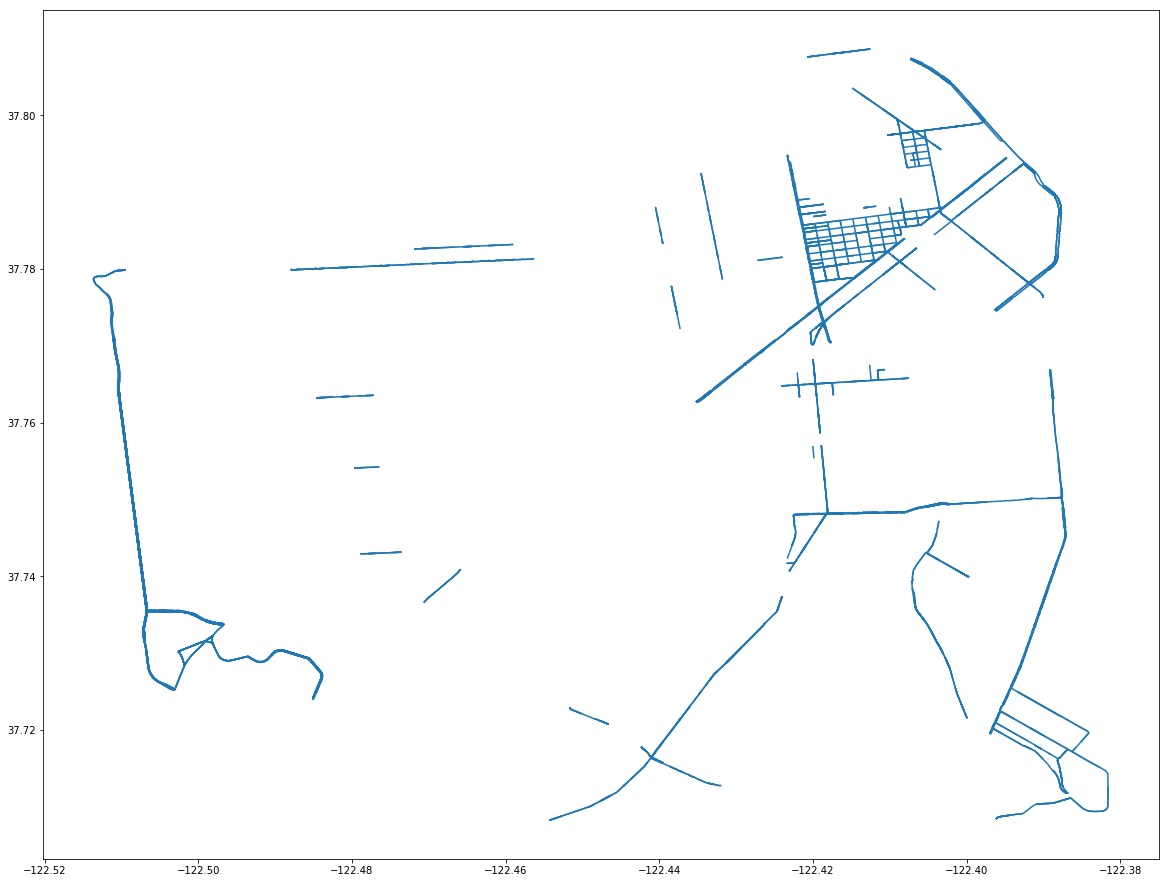

In [6]:
streetsweeping = gpd.read_file(proc_folder + 'final_sweeping.shp')
weekdaydict = {0: 'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
time =  dt.datetime.now()
cleaned_today = streetsweeping[streetsweeping.weekday == weekdaydict[time.weekday()]]
cleaned_today.plot(figsize = (20,20))

#Lets make a helper function as a bonus to identify recently cleaned streets that would be easier to park at

In [14]:
from math import ceil

def week_of_month(dt):
    """ Returns the week of the month for the specified date.
    """

    first_day = dt.replace(day=1)

    dom = dt.day
    adjusted_dom = dom + first_day.weekday()

    return int(ceil(adjusted_dom/7.0))

In [22]:
streetvolume.head()

,lineid,v_over_cea,distance,streetname,vvol_carea,vvol_trkea,vvol_busea,speed_ea,oneway,speed,bike_class,time_ea,total_am,total_pm,total_ev,total_ea,geometry
0,15418,0.0,0.1532,HWY 101 NORTHBOUND,3405.10931,265.67899,0.0,59.96955,1,60,0,0.15328,17898.12590,13928.34755,10671.88221,3670.78830,LINESTRING (-122.3947633140051 37.705799300016...
1,15502,0.0,0.1049,ALANA,57.16659,5.01155,0.0,16.66667,0,30,0,0.37764,312.74319,114.65432,127.34847,62.17814,LINESTRING (-122.3960701555317 37.707089710661...
2,15504,0.0,0.1172,TUNNEL,0.00000,0.00000,0.0,16.66667,0,30,0,0.42192,0.00000,0.00000,0.00000,0.00000,LINESTRING (-122.4011409615126 37.706703815751...
3,17596,0.0,0.7164,SKYLINE,423.91119,8.02989,0.0,59.73132,0,60,3,0.71962,3632.46872,5075.52099,3542.20130,431.94108,LINESTRING (-122.4946014034616 37.698238692712...
4,17673,0.0,0.1524,I-280 S ON-RAMP,632.02358,11.09846,0.0,23.06543,1,30,0,0.39644,3795.64821,3769.27644,3134.78179,643.12204,LINESTRING (-122.4694172353115 37.704851953965...


In [25]:
streetvolume.dtypes

lineid         object
v_over_cea    float64
distance      float64
streetname     object
vvol_carea    float64
vvol_trkea    float64
vvol_busea    float64
speed_ea      float64
oneway          int64
speed           int64
bike_class      int64
time_ea       float64
total_am      float64
total_pm      float64
total_ev      float64
total_ea      float64
geometry       object
dtype: object

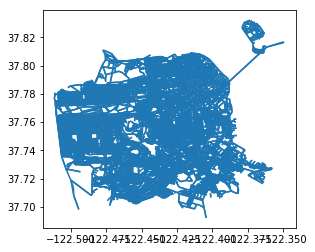

In [55]:
streetvolume = gpd.read_file(proc_folder + 'final_streets/SF_Street_Data.shp')
streetvolume = streetvolume[['vvol_carea', 'geometry']]
streetvolume = streetvolume.to_crs(epsg = 4326)
streetvolume.plot()

In [47]:
streetindex = streetvolume.index.values.astype(str)
streetvolume.set_index(streetindex, inplace = True)

In [48]:
da = streetvolume.index.values

In [51]:
da

array(['0', '1', '2', ..., '26794', '26795', '26796'], dtype=object)

In [52]:
streetvolume

,vvol_carea,geometry
0,3405.10931,LINESTRING (-122.3947633140051 37.705799300016...
1,57.16659,LINESTRING (-122.3960701555317 37.707089710661...
2,0.00000,LINESTRING (-122.4011409615126 37.706703815751...
3,423.91119,LINESTRING (-122.4946014034616 37.698238692712...
4,632.02358,LINESTRING (-122.4694172353115 37.704851953965...
5,172.51489,LINESTRING (-122.4694172353115 37.704851953965...
6,224.16459,LINESTRING (-122.4618214466111 37.705295941703...
7,0.54688,LINESTRING (-122.4672765524319 37.705959945000...
8,1.70313,LINESTRING (-122.4672765524319 37.705959945000...
9,0.97099,LINESTRING (-122.4672845927384 37.704836605961...


In [64]:
base = streetvolume.plot( column = 'vvol_carea', cmap = 'RdYlGn', alpha = .75)
mplleaflet.show(fig=base.figure, crs=streetvolume.crs, tiles='cartodb_positron')

In [60]:


def find_recent_street_cleaning(streetnumber, streetname, ResOT =False):
    ad = result_query("Select * from address_data where street = '" + streetname + "'" )
    if ad.shape[0] == 0:
        return print('Could not find streetname')
    ad['delta'] = np.abs(ad['number'] - streetnumber)
    ad.sort_values(by = 'delta', inplace = True)
    ad = ad.iloc[0]
    df = streetsweeping
    point = Point(ad.lon, ad.lat)
    if ResOT == True:
        invalid_ids = result_query('Select distinct lineid from address_data t1 join ticket_data t2 on '
                                  " t1.address = t2.address where ViolationDesc = 'RES/OT' ")
        
        df = df[df.lineid.isin(invalid_ids['lineid']) == False]
        
    weekdaydict = {0: 'Mon', 1:'Tues', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
    time =  dt.datetime.now()
    
    colname = 'week' + str(week_of_month(time)) + 'ofmon'
    cleaned_today = df[(df.weekday == weekdaydict[time.weekday()]) & (df[colname] == 1)]
    not_today = df[(df.weekday != weekdaydict[time.weekday()]) | (df[colname] == 0)]
    nhoods = gpd.read_file(raw_folder + '/AnalysisNeighborhoods.geojson')
    cleaned_today['distance'] = cleaned_today['geometry'].apply(lambda x: point.distance(x))
    cleaned_today.sort_values(by = 'distance', inplace = True)
    cleaned_today_closest = cleaned_today[:25]
    


    #ax = not_today.plot(color = 'red', alpha = .15)
    ax = cleaned_today.plot( color = 'yellow', alpha = .75)
    cleaned_today[:500].plot(ax = ax, color = 'green', alpha = 1)
    streetvolume.plot(ax = ax, column = 'vvol_carea', cmap = 'RdYlGn')
    circleaddress = matplotlib.patches.Circle((ad['lon'], ad['lat']), radius = 5)
    mplleaflet.show(fig=ax.figure, crs=cleaned_today.crs, tiles='cartodb_positron')
    return ax
                              

In [62]:
p = find_recent_street_cleaning(980, 'BUSH ST', ResOT =False
                            )
plt.show()

/home/colin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/colin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Estimated Sweeping Time
Finding a spot is a tough gig in San Francisco, so I've found the best practice is to know when the sweeping truck is coming by and try to follow him. Unsurprisingly, I'm not the only one who does this and it usually results in a death match between all cars. If you put in an address here, I'll give you an estimate as well a confidence interval on the range of times I would expect the truck to arrive, so you don't have to sit around and wait. 

In [ ]:
by_route = result_query("Select  strftime('%Y-%m-%d', TickIssueDate) as sweepdate, lineid, "
                        " max(strftime('%H:%M',TickIssueDate)) as last_ticket from ticket_data t1 "
                       " join address_data t2 on t1.address = t2.address WHERE ViolationDesc = 'STR CLEAN' "
                    " group by strftime('%Y-%m-%d', TickIssueDate) ,  lineid")

In [ ]:
by_route['weekday'] = by_route['sweepdate'].apply(lambda x: pd.to_datetime(x).weekday())
by_route['mins'] = by_route['last_ticket'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))

In [ ]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [ ]:
def min_to_time(mins):
    return str(math.ceil(mins / 60)) + ":" + str(int(mins%60))

In [ ]:
def return_conf_interval(number, street):
    ad = result_query("Select * from address_data where street = '" + street + "'" )
    if ad.shape[0] == 0:
        return print('Could not find streetname')
    ad['delta'] = np.abs(ad['number'] - number)
    ad.sort_values(by = 'delta', inplace = True)
    streeline = ad['lineid'].iloc[0]
    street_data = by_route[by_route.lineid == streeline]
    if street_data.shape[0] == 0:
        return print('No street sweeping ticket data found for closest address. ')
    mean, low, high = mean_confidence_interval(street_data['mins'])
    print("low: " + min_to_time(low))
    print("mean: " + min_to_time(mean))
    print("High: " + min_to_time(high))

In [ ]:
return_conf_interval(980, 'BUSH ST')

# Map the Sweeping route 
This will create an chart of the street sweepers route , so you can see where to catch him next. 

In [ ]:
by_street = by_route[by_route.weekday ==4].groupby(by = 'lineid', as_index = False)['mins'].mean()

In [ ]:
df = streetvolume.merge(by_street, left_on = 'lineid', right_on = 'lineid')

In [ ]:
df.plot(cmap = 'RdYlGn', column = 'mins', figsize = (20,20))